In [1]:
%matplotlib inline
import seaborn as sns
from birdsonganalysis.distribs import get_distribs
from birdsonganalysis import all_song_features
from scipy.io import wavfile
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
sr, samba = wavfile.read('../songs/samba.wav')
sr, simple = wavfile.read('../songs/simple.wav')
sr, bells = wavfile.read('../songs/bells.wav')
sr, flashcam = wavfile.read('../songs/flashcam.wav')

songs = [samba, simple, bells, flashcam]

# Get the medians and the MAD

In [3]:
f = defaultdict(lambda: np.array([], dtype=float))
for song in songs:
    feats = all_song_features(song, sr)
    for fname in feats:
        f[fname] = np.concatenate((f[fname], feats[fname]))

In [4]:
def mad(arr):
    """ Median Absolute Deviation: a "Robust" version of standard deviation.
        Indices variabililty of the sample.
        https://en.wikipedia.org/wiki/Median_absolute_deviation 
    """
    arr = np.ma.array(arr).compressed() # should be faster to not use masked arrays.
    med = np.median(arr)
    return np.median(np.abs(arr - med))

In [5]:
# We only take values where the amplitude is above 40 to avoid silence
from pprint import pprint
dmed = {}
dmad = {}
for key in f:
    cmed = np.median(f[key][f['amplitude'] > 40])
    cmad = mad(f[key][f['amplitude'] > 40])
    dmed[key] = cmed
    dmad[key] = cmad
print('med')
pprint(dmed)
print('mad')
pprint(dmad)

{'am': -0.0017108904797843044,
 'amplitude': 78.221571582172999,
 'entropy': -3.35714505290419,
 'fm': 0.73617178714745934,
 'pitch': 3180.8824462890625}
{'am': 0.7602533417227999,
 'amplitude': 7.8517415174917247,
 'entropy': 0.94736721708412053,
 'fm': 0.37789847802670956,
 'pitch': 824.90185546875}


Let's put these values in utils.py

Let's compute all the global errors and locals errors possible between all of these songs against each other (therefore, 4×3=12 comparisons)

In [6]:
allG, allL = get_distribs(songs)

# G² distribution
Let's plot allG

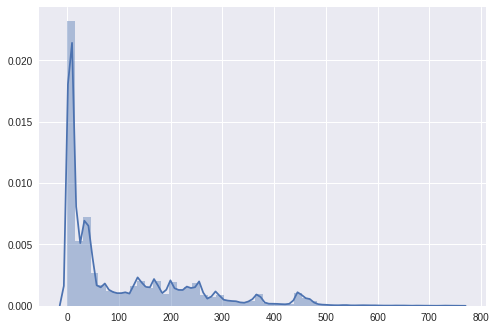

In [7]:
sns.distplot(allG)

Looks lognormal

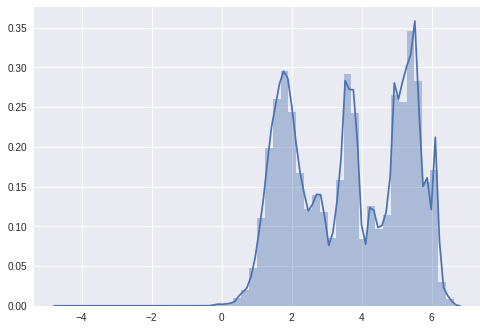

In [8]:
logallG = np.log(allG+0.01)
sns.distplot(logallG)  # Adds 0.01 to avoid -inf

In [9]:
np.mean(logallG)

3.6359735324494631

In [10]:
np.std(logallG, ddof=1)

1.6034598153962765

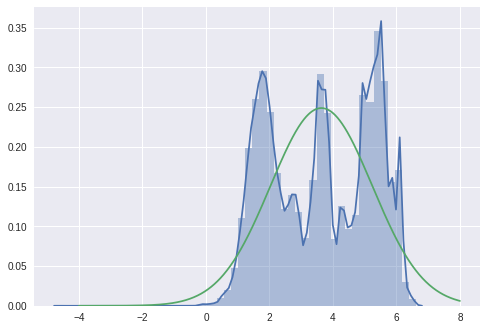

In [11]:
sns.distplot(logallG)  # Adds 0.01 to avoid -inf
plt.plot(np.linspace(-4, 8, 1000), norm.pdf(np.linspace(-4, 8, 1000), np.mean(logallG), np.std(logallG, ddof=1)))

The fit looks decent in log.

# L² distribution
Let's plot allL

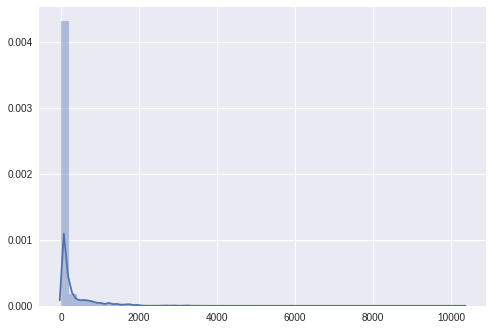

In [12]:
sns.distplot(allL)

Looks lognormal

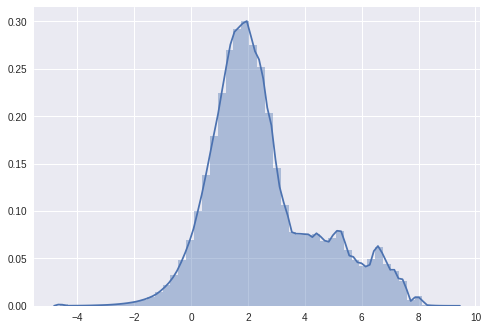

In [13]:
logallL = np.log(allL+0.01)
sns.distplot(logallL)  # Adds 0.001 to avoid -inf

In [14]:
np.mean(logallL)

2.5212985606078586

In [15]:
np.std(logallL, ddof=1)

1.9138147753306101

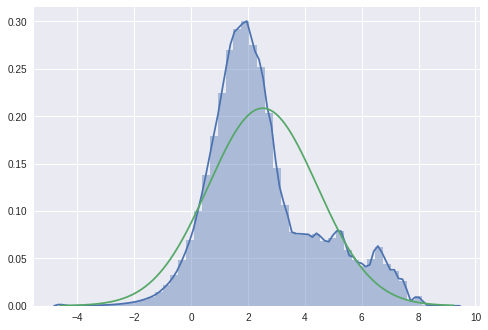

In [16]:
sns.distplot(logallL)  # Adds 0.001 to avoid -inf
imin, imax = np.min(logallL), np.max(logallL)
plt.plot(np.linspace(imin, imax, 1000), norm.pdf(np.linspace(imin, imax, 1000), np.mean(logallL), np.std(logallL, ddof=1)))

The fit looks decent in log.
We will use this value in similarity.py

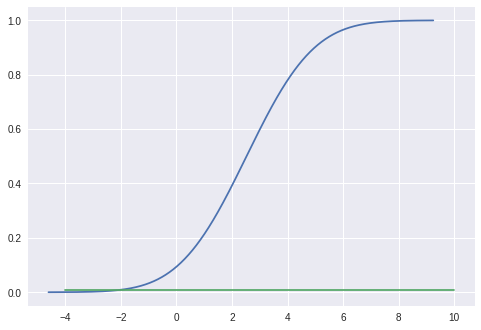

In [17]:
plt.plot(np.linspace(imin, imax, 1000), norm.cdf(np.linspace(imin, imax, 1000), np.mean(logallL), np.std(logallL, ddof=1)))
plt.plot([-4, 10], [0.01, 0.01])